In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
def read_data_file(filemame):
    df = pd.read_csv(filemame, header=None)
    df.columns = ["Exam1Score", "Exam2Score", "AdmitORNot"]
    return df

def segregate_x_y(df):
    df_x = df[["Exam1Score", "Exam2Score"]]  # single [] gives error in this case
    df_y = df[["AdmitORNot"]]  # if i put single [] then it return series and [[]] return dataframe
    return df_x, df_y

def segregate_x_into_pass_fail(df_x, df_y):
    mask_pass = df_y["AdmitORNot"] == 1
    df_x_pass = df_x[mask_pass]
    df_x_fail = df_x[~mask_pass]
    return df_x_pass, df_x_fail

def plot_pass_fail(df_x_pass, df_x_fail):
    plt.scatter(df_x_pass["Exam1Score"], df_x_pass["Exam2Score"], marker="o", color="green", label="Admitted")
    plt.scatter(df_x_fail["Exam1Score"], df_x_fail["Exam2Score"], marker="o", color="red", label="Not Admitted")
    plt.xlabel("Exam1 Score")
    plt.ylabel("Exam2 Score")
    plt.legend(loc="best")
    return plt

def fit_x(df_x, df_y):
    x = np.c_[np.ones(df_x.shape[0]), df_x] # this will change you data frame to numpy array
    theta = np.zeros((x.shape[1], 1))
    y = df_y.to_numpy()                     # here are are manually using function to convert dataframe to numpy array
    return x, y, theta

def z(x, theta):
    return np.dot(x, theta)

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))  # note outer brackets in denominator are important else it bad/wrong result.

def cost_function(theta, x, y):
    m = x.shape[0]
    h = sigmoid(z(x, theta))
    j = (1 / m) * (np.dot(np.log(h).T, -y) - np.dot(np.log(1 - h).T, (1 - y)))
    return j

def first_deri_j(theta, x, y):
    m = x.shape[0]
    h = sigmoid(z(x, theta))
    calculation = (1 / m) * (np.dot((h - y).T, x))
    return calculation.T

def get_best_theta_using_scipy_lib(cost_func_name, theta, first_deri_of_cost_func, x, y):
    temp = opt.fmin_tnc(func=cost_func_name,
                        x0=theta.flatten(),
                        fprime=first_deri_of_cost_func,
                        args=(x, y.flatten()))
    return temp

initial_cost using  zero as intial theta= [[0.69314718]]
Auto Optimized theta =  [[-25.16131854]
 [  0.20623159]
 [  0.20147149]]
final_cost using  optimized theta= [[0.2034977]]


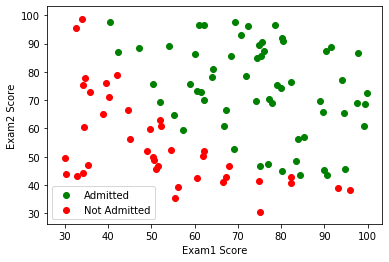

In [4]:
df = read_data_file("ex2data1.txt")
df_x, df_y = segregate_x_y(df)
df_x_pass, df_x_fail = segregate_x_into_pass_fail(df_x, df_y)
plt = plot_pass_fail(df_x_pass, df_x_fail)
x, y, theta = fit_x(df_x, df_y)
initial_cost = cost_function(theta, x, y)
print("initial_cost using  zero as intial theta=", initial_cost)
theta_optimized = get_best_theta_using_scipy_lib(cost_function, theta, first_deri_j, x, y)
theta = np.array([theta_optimized[0][0],theta_optimized[0][1],theta_optimized[0][2]]).reshape(3,1)
print("Auto Optimized theta = ",theta )
print("final_cost using  optimized theta=", cost_function(theta, x, y))